## Main File cum Report for Question 2 - Implementing Naive Bayes with Gaussian Likelihood

The contents of this file use modules/functions written for Naive Bayes as a part of question 2 named `NB` in `NB.py` and `get_dataset` from `dataloader.py`. Pre-existing modules used include:

+ `numpy` for some vector operations
+ `matplotlib.pyplot` for plotting purposes

Suitable comments and annotations have been added in important places

In [1]:
from NB import NB
import numpy as np
from dataloader import get_dataset
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

print("Imports done.")

Imports done.


In [2]:
def confusion_matrix(actual, predicted, positive=1):
    # Function to return a confusion matrix
    # Args:
    #      actual = The actual outputs : numpy.ndarray of shape (n_points, ) or list of length n_points
    #      predicted = The predicted outputs : numpy.ndarray of shape (n_points, ) or list of length n_points
    #      positive = (Optional, default = 1) The value out of 0 and 1 to be considered as positive
    # Returns:
    #      Dictionary with True Positive, True Negative, False Positive and False Negative readings
    #      Format:
    #            {'TP': <value>, 'TN': <value>, 'FP': <value>, 'FN': <value>}
    assert len(actual) == len(predicted), "Wrong dimensions of comparable outputs"
    
    # Initialize counts
    TP = TN = FP = FN = 0
    negative = 0 if positive == 1 else 1
    
    for i in range(0, len(actual)):
        if actual[i] == positive:
            if predicted[i] == positive:
                TP += 1
            elif predicted[i] == negative:
                FN += 1
        elif actual[i] == negative:
            if predicted[i] == positive:
                FP += 1
            elif predicted[i] == negative:
                TN += 1
                
    conf_dict = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
    return conf_dict

def accuracy(conf_matrix):
    # Function to calculate accuracy based on confusion matrix
    # Args:
    #      conf_matrix = The confusion matrix dictionary generated by confusion_matrix() function
    # Returns:
    #      accuracy
    return float(round((conf_matrix['TP'] + conf_matrix['TN'])/(sum(conf_matrix.values())), 5)*100)

def f1score(conf_matrix):
    # Function to calculate F1-Score based on confusion matrix
    # Args:
    #      conf_matrix = The confusion matrix dictionary generated by confusion_matrix() function
    # Returns:
    #      f1-score
    return float(round((2*conf_matrix['TP'])/(2*conf_matrix['TP'] + conf_matrix['FN'] + conf_matrix['FP']), 5))

def display_confusion_matrix(conf_matrix, train=True):
    # Function to display the confusion matrix efficiently
    conf_matrix_array = np.array([[conf_matrix['TN'], conf_matrix['FN']],[conf_matrix['FP'], conf_matrix['TP']]])
    plt.matshow(conf_matrix_array, interpolation='nearest', cmap=plt.cm.coolwarm)    
    
    for i in range(0, 2):
        for j in range(0, 2):
            plt.annotate(str(conf_matrix_array[i,j]), xy=(j,i), horizontalalignment='center', verticalalignment='center')
    
    plt.xlabel('Actual labels', size=15)
    plt.ylabel('Predicted labels', size=15)
    plt.xticks([0, 1], ['Non-spam', 'Spam'])
    plt.yticks([0, 1], ['Non-spam', 'Spam'])
    if train == True:
        plt.title("Confusion matrix for training data predictions")
    else:
        plt.title("Confusion matrix for testing data predictions")
    plt.show()

In [3]:
# Getting dataset
# If the EmailsData folder is in another directory, please modify the below line
# This will take sometime, because of the TfidfVectorizer and SelectKBest operations going on.

def_root = './'
tr, te = get_dataset(root=def_root)
tr_x, tr_y = tr[:,: tr.shape[1] - 1], tr[:,tr.shape[1] - 1]
te_x, te_y = te[:,: te.shape[1] - 1], te[:,te.shape[1] - 1]

print("Datasets loaded from the files.")

print("Training inputs shape:\t{0}\tTraining outputs shape:{1}".format(tr_x.shape, tr_y.shape))
print("Testing inputs shape:\t{0}\tTesting outputs shape:{1}".format(te_x.shape, te_y.shape))

Datasets loaded from the files.
Training inputs shape:	(700, 50)	Training outputs shape:(700,)
Testing inputs shape:	(260, 50)	Testing outputs shape:(260,)


In [4]:
# Running Gaussian Naive-Bayes
# Methods in consideration:
# 1. My implementation
# 2. sklearn implementation
my_NB = NB()
my_NB.fit(X=tr_x, Y=tr_y)
my_train_predict, _ = my_NB.predict(X=tr_x)
my_test_predict, _ = my_NB.predict(X=te_x)

the_NB = GaussianNB()
the_NB.fit(X=tr_x, y=tr_y)
the_train_predict = the_NB.predict(X=tr_x)
the_test_predict = the_NB.predict(X=te_x)

In [5]:
# Constructing the confusion matrix
my_train_conf_mat = confusion_matrix(actual=tr_y, predicted=my_train_predict)
my_test_conf_mat = confusion_matrix(actual=te_y, predicted=my_test_predict)

the_train_conf_mat = confusion_matrix(actual=tr_y, predicted=the_train_predict)
the_test_conf_mat = confusion_matrix(actual=te_y, predicted=the_test_predict)

Now that the confusion matrices are ready, I will be using a function `display_confusion_matrix` to display them in a graphical sense. Below are the confusion matrices for my implementation of Naive Bayes using Gaussian Likelihood Estimation:

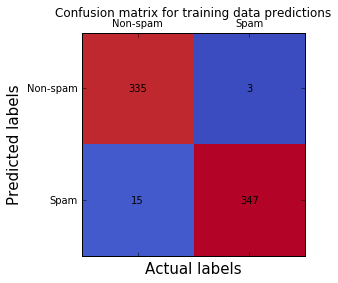

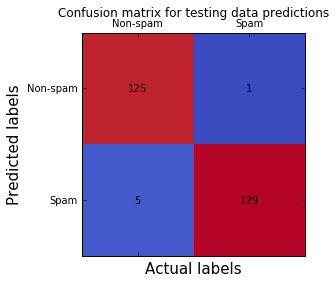

In [6]:
display_confusion_matrix(my_train_conf_mat)
display_confusion_matrix(my_test_conf_mat, train=False)

Similarly, below are the confusion matrices for `sklearn`'s implementation of Gaussian Naive Bayes:

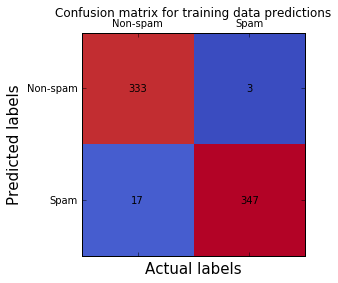

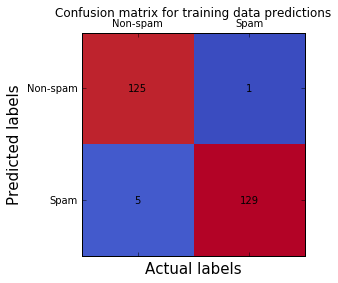

In [7]:
display_confusion_matrix(the_train_conf_mat)
display_confusion_matrix(the_test_conf_mat)

In [8]:
print('{0}\t{1}'.format(accuracy(my_train_conf_mat), accuracy(my_test_conf_mat)))
print('{0}\t{1}'.format(accuracy(the_train_conf_mat), accuracy(the_test_conf_mat)))

print('{0}\t{1}'.format(f1score(my_train_conf_mat), f1score(my_test_conf_mat)))
print('{0}\t{1}'.format(f1score(the_train_conf_mat), f1score(the_test_conf_mat)))

97.429	97.69200000000001
97.143	97.69200000000001
0.97472	0.97727
0.97199	0.97727


Based on the confusion matrices generated, I have calculated the **accuracies** obtained on the training and testing set when my implementation and `sklearn`'s implementation were used. 

|   | Train Accuracy | Test Accuracy |
|---|---|---|
| My Implementation | 97.429% | 97.692% |
| `sklearn` Implementation  | 96.143% | 97.692% |

I have also calculated the **F1-Scores** of the classifiers. Below is the table respresents my observations:

|   | Train F1-Score | Test F1-Score |
|---|---|---|
| My Implementation | 0.97472 | 0.97727 |
| `sklearn` Implementation  | 0.97199 | 0.97727 |

On the test data, both the models perform equally well, which suggests that the code is correct and logical appropriate. 

I speculate that the reason for such accuracies is because of the `SelectKBest` and `mutual_info_classif` functions, which enable selecting the __best__, __independent__ attributes, which is key to the naivity of the Naive Bayes Algorithm. I also think that the distribution of the inputs follow a Gaussian, possibly a multi-modal Gaussian (mixture). It would be interesting to see the results if we used a Gaussian Mixture for the likelihood estimation.